# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [2]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 2.7 MB/s eta 0:00:00


In [3]:
import random
import math
import numpy as np
from sklearn import preprocessing

import os
import pandas as pd
import zipfile

from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras_tuner import Hyperband, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Load the data

In [5]:
bh=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Bhadla solar Power Park/27.420177_72.070427_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
ch=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Charan Solar Park/23.902077_71.19477_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
dh=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Dhirubhai Ambani/26.793418_72.009013_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
kam=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Kamuthi Solar Park/9.415969_78.248047_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
kaz=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/32.2275_78.07099_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
kur=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Kurnool/15.855387_78.065199_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
man=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Mandsur Solar Farm/23.986373_75.32641_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
pava=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Pavagada Solar park/14.138196_77.314631_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
pha=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Phalodi_Solar_Park/27.294_72.365_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
rew=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Rewa Ultra Mega Solar/24.630418_81.537174_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
sak=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Sakri Solar Plant/21.085624_74.352948_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)
tan=pd.read_csv("/content/drive/MyDrive/Generalization_India_Models/Tangste Solar Plant/33.9608_78.0579_Solcast_PT15M.csv",usecols=['PeriodStart','AirTemp','Azimuth','CloudOpacity','Ghi',"PrecipitableWater",	"RelativeHumidity","SurfacePressure","WindDirection10m"	,"WindSpeed10m"	,"Zenith"	,"AlbedoDaily"],parse_dates=True)

# Data Processing

In [6]:
class DateTimeConverter:
    def __init__(self, data):
        self.data = data
    def add_month_hour_columns(self):
      self.data['Month']=pd.to_datetime(self.data['PeriodStart']).dt.month
      self.data['Hour']=pd.to_datetime(self.data['PeriodStart']).dt.hour
    def add_features(self):
      self.data = pd.get_dummies(self.data, columns=['Month'])
      self.data['sin_hour'] = np.sin(2*np.pi*self.data['Hour'].astype(int)/24)
      self.data['cos_hour'] = np.cos(2*np.pi*self.data['Hour'].astype(int)/24)
    def visualize_transformations(self):
      fig, ax = plt.subplots()
      ax.plot(self.data['Hour'].iloc[:96], self.data['Ghi'].iloc[:96]/1000, label='Solar Irradiance')
      ax.plot(self.data['Hour'].iloc[:96], self.data['sin_hour'].iloc[:96], label='Sine of Hour')
      ax.plot(self.data['Hour'].iloc[:96], self.data['cos_hour'].iloc[:96], label='Cosine of Hour')
      ax.set_xlabel('Hour of Day')
      ax.set_ylabel('Value')
      ax.set_title('Solar Irradiance and Time of Day Transformations')
      ax.legend()
      plt.show()

    def remove_features(self):
      self.data.drop(['Year', 'Day', 'Minute', 'Hour','Clearsky GHI', 'DHI', 'DNI', 'Clearsky DHI', 'Clearsky DNI','Fill Flag'],inplace=True,axis=1)
    
    def get_data(self):
      return self.data



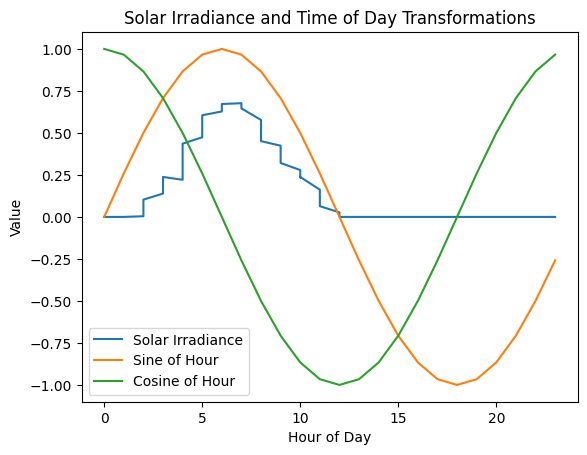

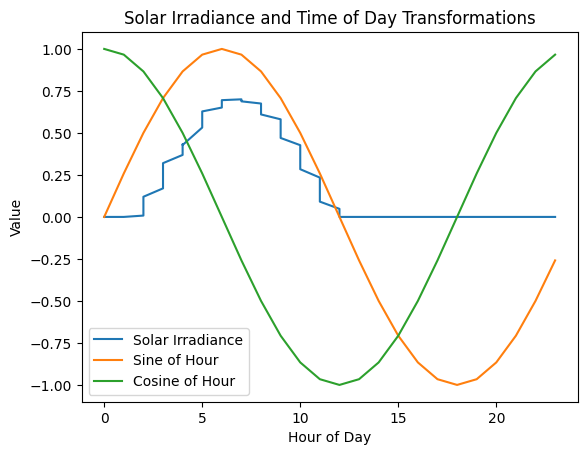

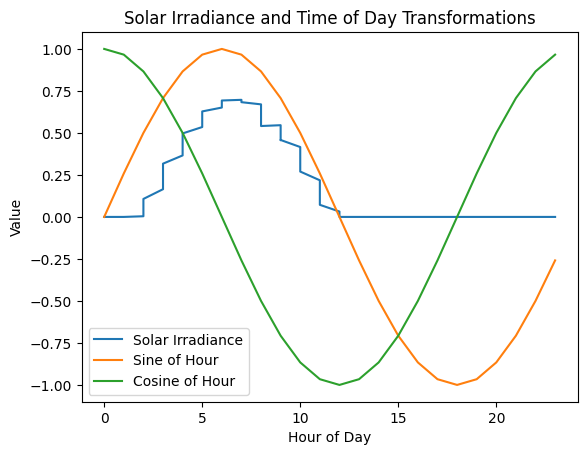

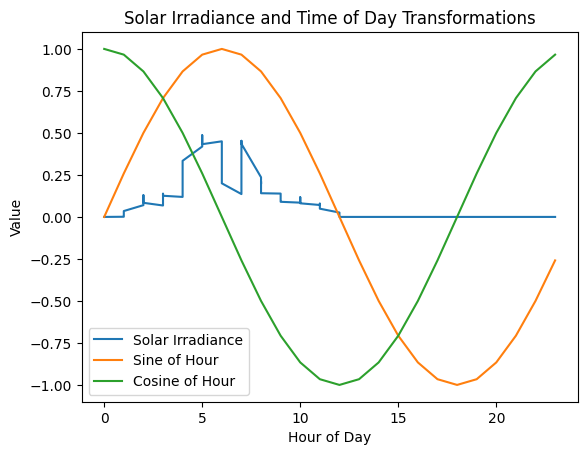

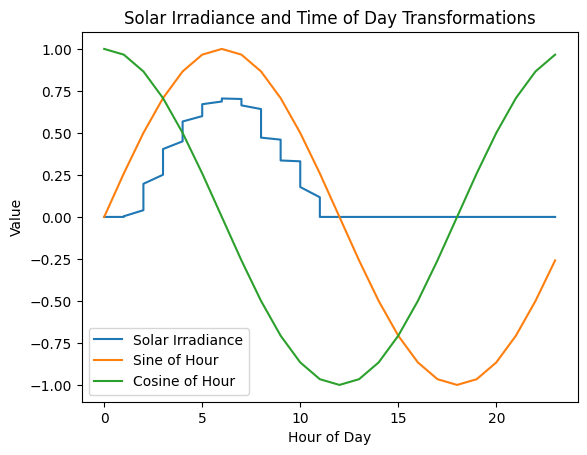

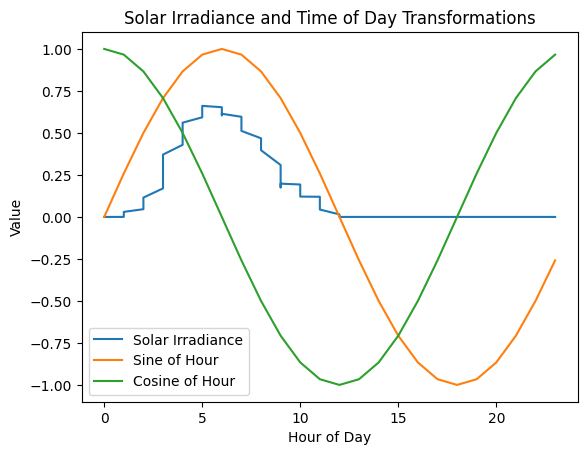

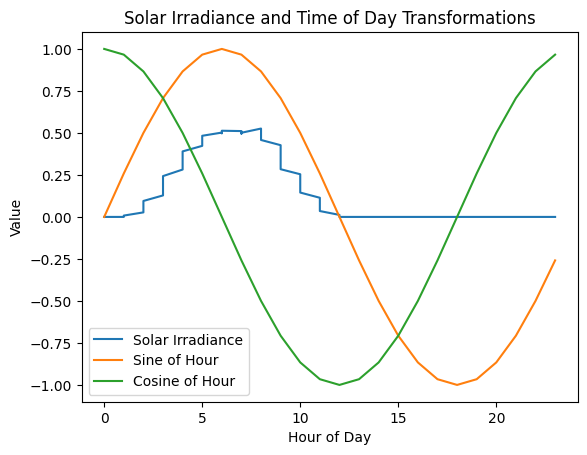

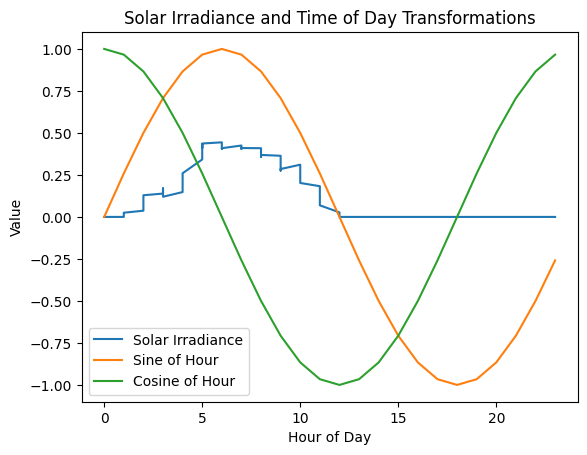

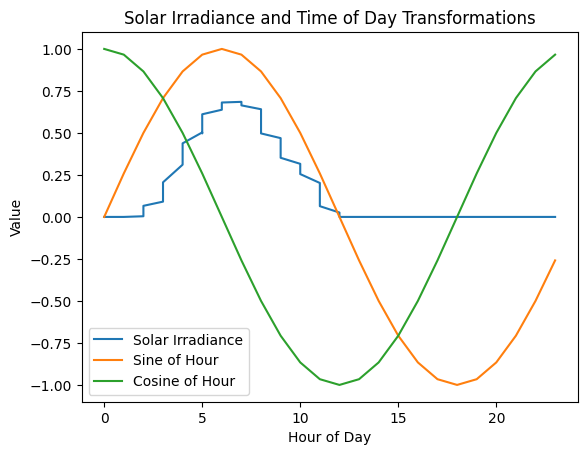

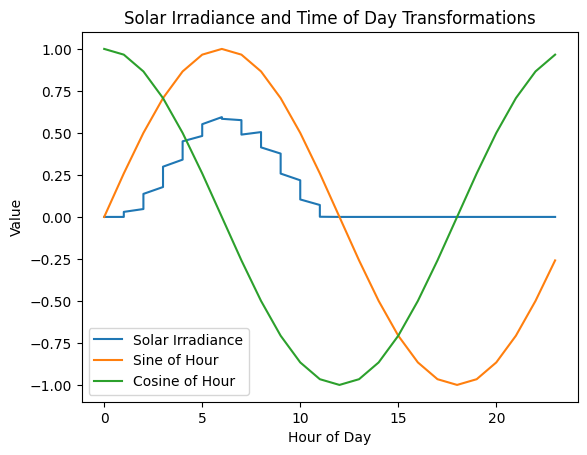

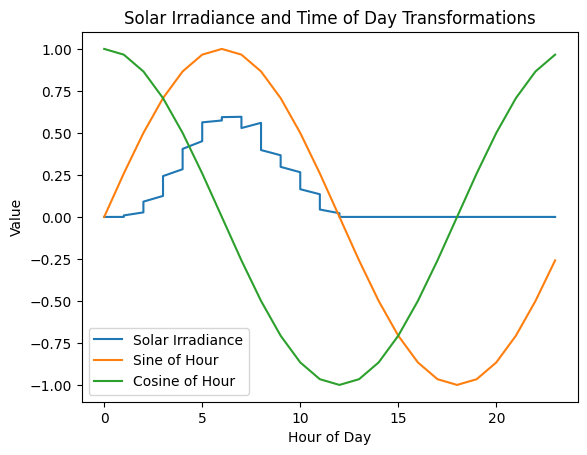

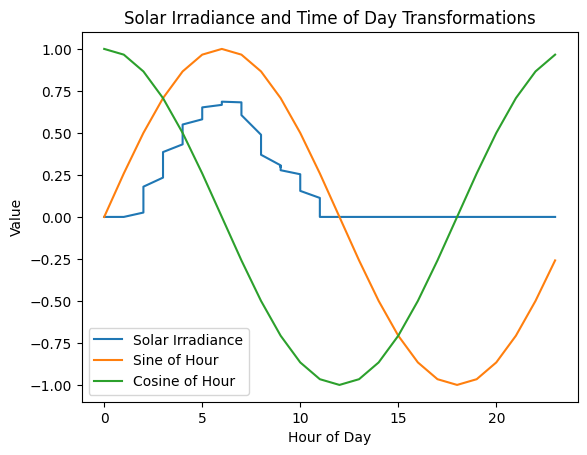

In [7]:
# bh
dt_converter = DateTimeConverter(bh)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
bh=dt_converter.get_data()
# ch
dt_converter = DateTimeConverter(ch)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
ch=dt_converter.get_data()
# dh
dt_converter = DateTimeConverter(dh)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
dh=dt_converter.get_data()
# kam
dt_converter = DateTimeConverter(kam)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
kam=dt_converter.get_data()
# kaz
dt_converter = DateTimeConverter(kaz)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
kaz=dt_converter.get_data()
# kur
dt_converter = DateTimeConverter(kur)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
kur=dt_converter.get_data()
# man
dt_converter = DateTimeConverter(man)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
man=dt_converter.get_data()
# pava
dt_converter = DateTimeConverter(pava)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
pava=dt_converter.get_data()
# pha
dt_converter = DateTimeConverter(pha)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
pha=dt_converter.get_data()
# rew
dt_converter = DateTimeConverter(rew)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
rew=dt_converter.get_data()
# sak
dt_converter = DateTimeConverter(sak)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
sak=dt_converter.get_data()
# tan
dt_converter = DateTimeConverter(tan)
dt_converter.add_month_hour_columns()
dt_converter.add_features()
dt_converter.visualize_transformations()
tan=dt_converter.get_data()


# Checking the variance of the data

In [ ]:
class SolarIrradianceMetrics:
    def __init__(self, data_file):
        self.data = data_file
        self.Irradiance = self.data['Ghi']

    def get_mean(self):
        return np.mean(self.Irradiance)

    def get_iqr(self):
        q1 = np.percentile(self.Irradiance, 25)
        q3 = np.percentile(self.Irradiance, 75)
        return q3 - q1

    def get_std_dev(self):
        return np.std(self.Irradiance)

    def plot_histogram(self):
        plt.hist(self.Irradiance, bins=50)
        plt.title('Distribution of Solar Irradiance Data')
        plt.xlabel('Irradiance (w/m^2)')
        plt.ylabel('Frequency')
        plt.show()

    def plot_boxplot(self):
        plt.boxplot(self.Irradiance)
        plt.title('Boxplot of Solar Irradiance Data')
        plt.xlabel('Irradiance (w/m^2)')
        plt.show()

    def plot_stats(self):
        mean = self.get_mean()
        iqr = self.get_iqr()
        std_dev = self.get_std_dev()

        fig, ax = plt.subplots()
        ax.bar(['Mean', 'IQR', 'Std. Dev.'], [mean, iqr, std_dev])
        ax.set_title('Statistics of Solar Irradiance Data')
        ax.set_ylabel('Irradiance (W/m^2)')
        plt.show()


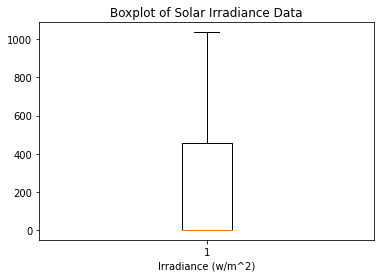

Stnadard Deviation :- 300.776681824732
Inter-quartile Range :- 455.0
Mean :- 220.87882733585857


In [ ]:
sm=SolarIrradianceMetrics(bh)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

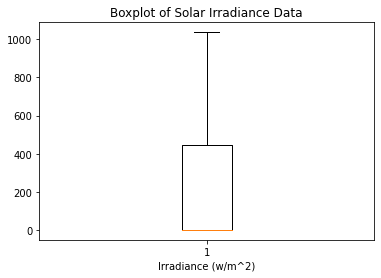

Stnadard Deviation :- 299.4462966874787
Inter-quartile Range :- 443.25
Mean :- 218.87026515151516


In [ ]:
sm=SolarIrradianceMetrics(ch)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

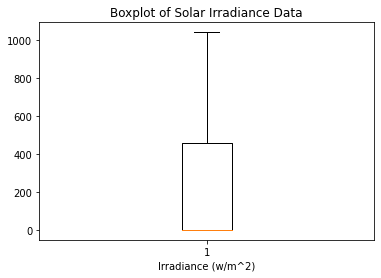

Stnadard Deviation :- 303.24702833181635
Inter-quartile Range :- 456.0
Mean :- 222.03224957912457


In [ ]:
sm=SolarIrradianceMetrics(dh)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

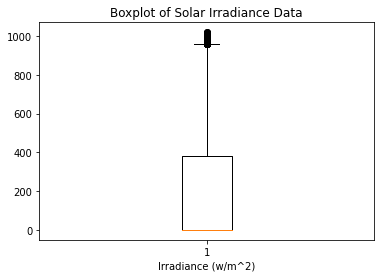

Stnadard Deviation :- 290.02785081617975
Inter-quartile Range :- 383.0
Mean :- 204.68711858164983


In [ ]:
sm=SolarIrradianceMetrics(kam)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

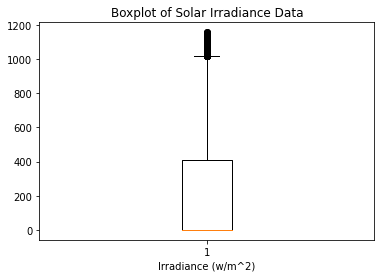

Stnadard Deviation :- 310.9372758982954
Inter-quartile Range :- 407.0
Mean :- 221.69787720959596


In [ ]:
sm=SolarIrradianceMetrics(kaz)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

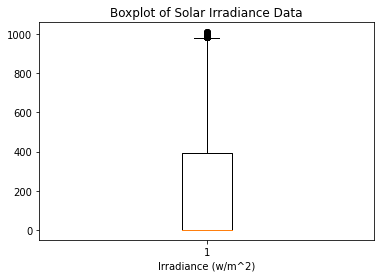

Stnadard Deviation :- 292.4554611962433
Inter-quartile Range :- 393.0
Mean :- 207.43233112373738


In [ ]:
sm=SolarIrradianceMetrics(kur)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

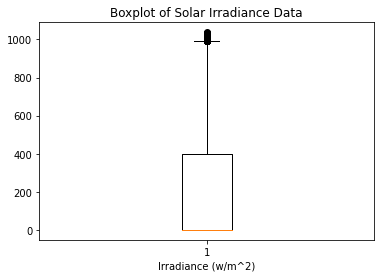

Stnadard Deviation :- 293.2598505729882
Inter-quartile Range :- 397.0
Mean :- 206.58691077441077


In [ ]:
sm=SolarIrradianceMetrics(man)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

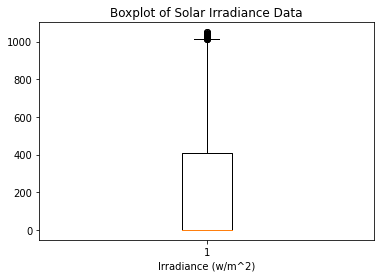

Stnadard Deviation :- 300.8688450373308
Inter-quartile Range :- 406.25
Mean :- 214.91398358585857


In [ ]:
sm=SolarIrradianceMetrics(pava)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

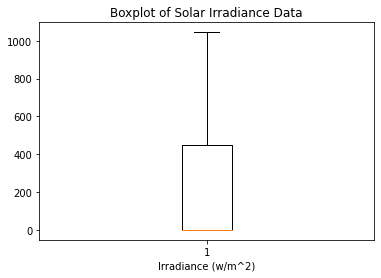

Stnadard Deviation :- 300.6777040313171
Inter-quartile Range :- 451.0
Mean :- 220.29261363636363


In [ ]:
sm=SolarIrradianceMetrics(pha)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

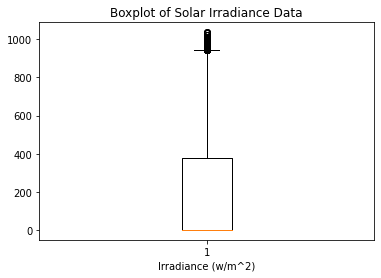

Stnadard Deviation :- 283.85183627053846
Inter-quartile Range :- 378.0
Mean :- 198.93054240319864


In [ ]:
sm=SolarIrradianceMetrics(rew)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

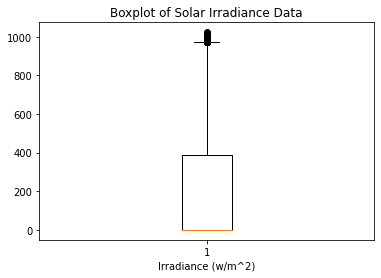

Stnadard Deviation :- 288.5697624045657
Inter-quartile Range :- 389.0
Mean :- 204.15330387205387


In [ ]:
sm=SolarIrradianceMetrics(sak)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

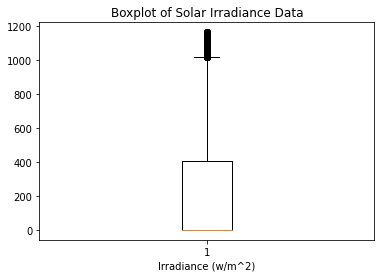

Stnadard Deviation :- 305.13550593345474
Inter-quartile Range :- 407.0
Mean :- 220.37240898569024


In [ ]:
sm=SolarIrradianceMetrics(tan)
sm.plot_boxplot()
print("Stnadard Deviation :-",sm.get_std_dev())
print("Inter-quartile Range :-",sm.get_iqr())
print("Mean :-",sm.get_mean())

# Finding Optimal Time steps Lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

class AutocorrelationAnalyzer:
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def calculate_acf(self, lags=None):
        if lags is None:
            lags = len(self.data) - 1
        acf_values = pd.Series(self.data[self.column_name]).autocorr(lag=lags)
        return acf_values

    def plot_acf(self, lags=None):
        if lags is None:
            lags = len(self.data) - 1
        fig, ax = plt.subplots(figsize=(10, 6))
        plot_acf(self.data[self.column_name], lags=lags, ax=ax)
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('Autocorrelation Function')
        plt.show()

Autocorrelation at lag 4: 0.930416574132719


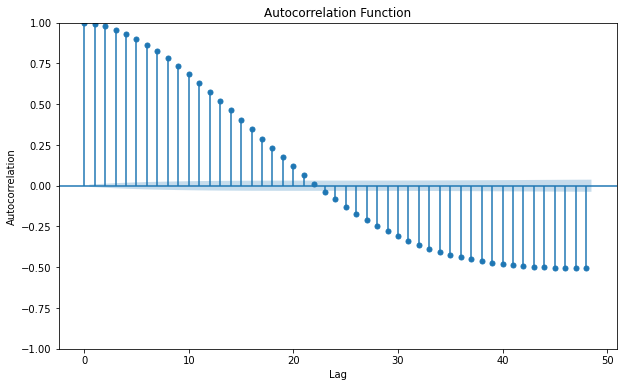

In [ ]:




# Replace 'irradiance' with the name of the column containing your irradiance data
column_name = 'Ghi'

# Create an AutocorrelationAnalyzer instance
analyzer = AutocorrelationAnalyzer(kaz, column_name)

# Calculate and print the autocorrelation for a specific lag (e.g., 4)
lag = 4
print(f"Autocorrelation at lag {lag}: {analyzer.calculate_acf(lag)}")

# Plot the autocorrelation function for the time series
lags_to_plot = 48  # Adjust this value as needed
analyzer.plot_acf(lags_to_plot)

In [ ]:
lag = 96
print(f"Autocorrelation at lag {lag}: {analyzer.calculate_acf(lag)}")

Autocorrelation at lag 96: 0.9121131977606574


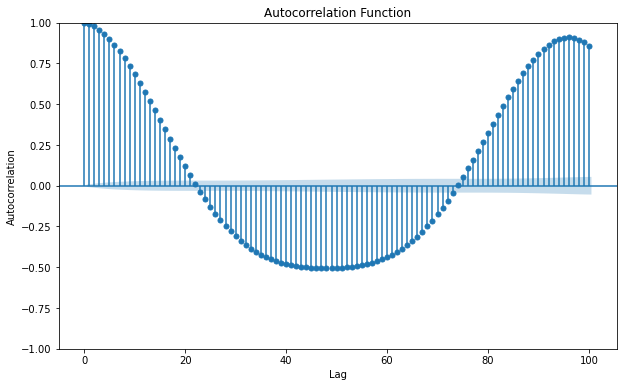

In [ ]:
# Plot the autocorrelation function for the time series
lags_to_plot = 100  # Adjust this value as needed
analyzer.plot_acf(lags_to_plot)

# Data Spliting

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

class SplitData:

    def __init__(self,data,n_timesteps, n_outputs, only_production=False):
        # Read data from csv
        self.df=data
        # self.train=train
        # self.test=test

        self.train = None
        self.test = None

        self.x_train = None
        self.y_train = None

        self.x_test = None
        self.y_test = None

        self.only_production = only_production
        self.lag = n_timesteps

        self.n_features = None
        self.num_of_outputs = n_outputs
        
        self.cols = self.df.columns


    def split_sequences(self, sequences):
        X, y = list(), list()
        for i in range(len(sequences)):
            # find the end of this pattern 
            end_ix = i + self.lag
            # check if we are beyond the dataset
            if end_ix > len(sequences):
                break
            # gather input and output parts of the pattern
            if self.only_production:
                seq_x, seq_y = sequences[i:end_ix, -1], sequences[end_ix:(end_ix+self.num_of_outputs), -1]
            else:
                seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:(end_ix+self.num_of_outputs),-1]
            X.append(seq_x)
            y.append(seq_y)
        return (np.array(X), np.array(y))

    def unique_shapes(self,x, y, lag_, n_features_, num_of_outputs_, only_production):
        uniuqe_shapes = []
        for k in range(len(x)):
            if only_production==True:
                if (x[k].shape == (lag_,)) & (y[k].shape == (num_of_outputs_,)):
                    uniuqe_shapes.append(k)
            else:
                if (x[k].shape == (lag_, n_features_)) & (y[k].shape == (num_of_outputs_,)):
                    uniuqe_shapes.append(k)       
        x = x[uniuqe_shapes]
        y = y[uniuqe_shapes]
        x = np.stack(x)
        y = np.stack(y)
        return (x, y)
    # def unique_shapes(self, x, y, lag_, n_features_, num_of_outputs_, only_production):
    #   uniuqe_shapes = []
    #   for k in range(len(x)):
    #       if only_production==True:
    #           if (x[k].shape == (lag_,)) & (y[k].shape == (num_of_outputs_,)):
    #               uniuqe_shapes.append(k)
    #       else:
    #           if (x[k].shape == (lag_, n_features_)) & (y[k].shape == (num_of_outputs_,)):
    #               uniuqe_shapes.append(k)       
    #   x = x[uniuqe_shapes]
    #   y = y[uniuqe_shapes]
    #   if len(x) > 0 and len(y) > 0:
    #       x = np.stack(x)
    #       y = np.stack(y)
    #   else:
    #       x = np.empty((0, lag_, n_features_))
    #       y = np.empty((0, num_of_outputs_))
    #   return (x, y)

    def preprocess_data(self):
        # Select non-correlated variables and perform One-Hot-Encoding to Months and Sin-Cos Similarities to Hours
        self.n_features = len(self.cols)

        feature_index = self.df.columns.get_loc('Ghi')

        # Pop the feature from its current position
        df_feature = self.df.pop('Ghi')

        # Insert the feature at the last index
        self.df.insert(len(self.df.columns), 'Ghi', df_feature)

        # Set the training data range
        train_start = "2020-12-31T00:00:00Z"
        train_end = "2022-12-31T23:45:00Z"

        # Set the test data range
        test_start = "2022-12-31T23:45:00Z"

        # Convert the 'PeriodStart' column to a datetime format
        self.df['PeriodStart'] = pd.to_datetime(self.df['PeriodStart'])

        # Split the data into train and test sets based on the date and time range
        self.train = self.df[(self.df['PeriodStart'] >= train_start) & (self.df['PeriodStart'] <= train_end)]
        self.test = self.df[self.df['PeriodStart'] > test_start]
        display(self.train.head(20))

        self.x_train, self.y_train = self.split_sequences(self.train.values)
        self.x_test, self.y_test = self.split_sequences(self.test.values)
        print(self.x_train[20])

        self.x_train, self.y_train = self.unique_shapes(self.x_train, self.y_train, self.lag, self.n_features, self.num_of_outputs, self.only_production)
        self.x_test, self.y_test   = self.unique_shapes(self.x_test,  self.y_test,  self.lag, self.n_features, self.num_of_outputs,self.only_production)

        return (self.x_train[:, :, 1:],self.y_train,self.x_test[:, :, 1:],self.y_test)



In [17]:
len(bh.columns)-1

26

In [18]:
n_timesteps=96
n_features=26
n_outputs=1

In [19]:
sd=SplitData(kaz,n_timesteps,n_outputs,only_production=False)
X_train,y_train,X_test,y_test=sd.preprocess_data()

,PeriodStart,AirTemp,Azimuth,CloudOpacity,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,sin_hour,cos_hour,Ghi
0,2020-12-31 00:00:00+00:00,-29.3,-105,0.0,0.6,42.8,637.6,286,0.7,111,...,0,0,0,0,0,0,1,0.000000,1.000000,0
1,2020-12-31 00:15:00+00:00,-29.3,-107,0.0,0.6,43.0,637.7,286,0.7,108,...,0,0,0,0,0,0,1,0.000000,1.000000,0
2,2020-12-31 00:30:00+00:00,-29.4,-108,0.0,0.6,43.3,637.7,286,0.7,105,...,0,0,0,0,0,0,1,0.000000,1.000000,0
3,2020-12-31 00:45:00+00:00,-29.4,-110,0.0,0.6,43.5,637.8,286,0.7,102,...,0,0,0,0,0,0,1,0.000000,1.000000,0
4,2020-12-31 01:00:00+00:00,-29.4,-112,0.0,0.6,43.5,637.9,286,0.7,99,...,0,0,0,0,0,0,1,0.258819,0.965926,0
5,2020-12-31 01:15:00+00:00,-29.4,-114,0.0,0.6,43.4,638.0,286,0.7,96,...,0,0,0,0,0,0,1,0.258819,0.965926,0
6,2020-12-31 01:30:00+00:00,-29.4,-116,0.0,0.6,43.3,638.1,286,0.7,93,...,0,0,0,0,0,0,1,0.258819,0.965926,0
7,2020-12-31 01:45:00+00:00,-29.4,-118,0.0,0.6,43.2,638.2,286,0.7,90,...,0,0,0,0,0,0,1,0.258819,0.965926,4
8,2020-12-31 02:00:00+00:00,-29.4,-120,0.0,0.6,42.1,638.4,286,0.7,87,...,0,0,0,0,0,0,1,0.500000,0.866025,40
9,2020-12-31 02:15:00+00:00,-29.5,-122,0.0,0.6,40.1,638.6,286,0.7,85,...,0,0,0,0,0,0,1,0.500000,0.866025,89


<ipython-input-16-60fbe3171ac9>:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (np.array(X), np.array(y))


[[Timestamp('2020-12-31 05:00:00+0000', tz='UTC') -29.3 -153 ...
  0.9659258262890683 0.25881904510252074 600]
 [Timestamp('2020-12-31 05:15:00+0000', tz='UTC') -29.1 -156 ...
  0.9659258262890683 0.25881904510252074 628]
 [Timestamp('2020-12-31 05:30:00+0000', tz='UTC') -29.0 -160 ...
  0.9659258262890683 0.25881904510252074 652]
 ...
 [Timestamp('2021-01-01 04:15:00+0000', tz='UTC') -24.5 -143 ...
  0.8660254037844386 0.5000000000000001 321]
 [Timestamp('2021-01-01 04:30:00+0000', tz='UTC') -24.4 -146 ...
  0.8660254037844386 0.5000000000000001 327]
 [Timestamp('2021-01-01 04:45:00+0000', tz='UTC') -24.3 -149 ...
  0.8660254037844386 0.5000000000000001 398]]


In [20]:
X_train[20]

array([[-29.3, -153, 0.0, ..., 0.9659258262890683, 0.25881904510252074,
        600],
       [-29.1, -156, 0.0, ..., 0.9659258262890683, 0.25881904510252074,
        628],
       [-29.0, -160, 0.0, ..., 0.9659258262890683, 0.25881904510252074,
        652],
       ...,
       [-24.5, -143, 32.6, ..., 0.8660254037844386, 0.5000000000000001,
        321],
       [-24.4, -146, 36.6, ..., 0.8660254037844386, 0.5000000000000001,
        327],
       [-24.3, -149, 27.8, ..., 0.8660254037844386, 0.5000000000000001,
        398]], dtype=object)

In [22]:
y_train[:20]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [35],
       [73],
       [80],
       [46],
       [135],
       [213],
       [206],
       [174],
       [267],
       [321],
       [327],
       [398]], dtype=object)

In [ ]:
df=kaz.copy()

df_train_date=pd.DataFrame()
df_test_date=pd.DataFrame()
# Set the training data range
train_start = "2020-12-31T00:00:00Z"
train_end = "2022-12-31T23:45:00Z"

# Set the test data range
test_start = "2022-12-31T23:45:00Z"

# Convert the 'PeriodStart' column to a datetime format
df['PeriodStart'] = pd.to_datetime(df['PeriodStart'])

# Split the data into train and test sets based on the date and time range
df_train_date['Date'] = df[(df['PeriodStart'] >= train_start) & (df['PeriodStart'] <= train_end)]['PeriodStart']
df_test_date['Date'] = df[df['PeriodStart'] > test_start]['PeriodStart']

In [ ]:
df_train_date=df_train_date.iloc[-len(X_train):]
df_test_date=df_test_date.iloc[-len(X_test):]

# Data Scaling

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
# Flatten X_train and X_test to 2 dimensions
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Apply MinMaxScaler to flattened arrays
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# Reshape back to original shape
X_train= X_train_scaled.reshape(X_train.shape)
X_test= X_test_scaled.reshape(X_test.shape)

scaler_y = MinMaxScaler(feature_range=(0,1))
y_train = scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

# Solar Irradiance Forecasting Model

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM

class SolarPowerForecastingModel:

    def __init__(self, n_timesteps, n_features, n_outputs,Model=None):
        self.n_timesteps = n_timesteps
        self.n_features = n_features
        self.n_outputs = n_outputs
        self.model = Model
        
    def build_model(self, hp):
        self.model = Sequential()
        for i in range(hp.Int('num_layers', 1, 4)):
            if i == 0:
                self.model.add(Bidirectional(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                        return_sequences=True if i < hp.Int('num_layers', 1, 4) - 1 else False,
                                        input_shape=(self.n_timesteps, self.n_features))))
            else:
                self.model.add(Bidirectional(LSTM(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                                        return_sequences=True if i < hp.Int('num_layers', 1, 4) - 1 else False)))
        self.model.add(Dense(self.n_outputs))
        self.model.compile(loss='mean_squared_error', optimizer=Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), metrics=['mae'])
        return self.model

    def train_model(self, X_train, y_train, X_test, y_test, epochs, batch_size):
        mc = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=2, mode='min', restore_best_weights=True)
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping,mc])

    def load_trained_model(self, path):
        self.model = load_model(path)

    def save_trained_model(self, path):
        self.model.save(path)
    
    def predict(self, X):
        return self.model.predict(X)


In [ ]:
# Instantiate the hyperparameter tuner
tuner = BayesianOptimization(
    SolarPowerForecastingModel(n_timesteps, n_features, n_outputs).build_model,
    objective='val_loss',
    max_trials=1,
    executions_per_trial=1,
    directory='tuner_directory',
    project_name='solar_power_forecasting'
)

# Define the search space for hyperparameters
tuner.search_space_summary()

# Start the hyperparameter search
tuner.search(x=X_train, y=y_train, epochs=100, batch_size=128, validation_split=0.2, verbose=2)

# Retrieve the best model hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 1 Complete [00h 38m 30s]
val_loss: 0.0004540818918030709

Best val_loss So Far: 0.0004540818918030709
Total elapsed time: 00h 38m 30s


In [ ]:
import json
with open('best_hps.json', 'w') as f:
    json.dump(best_hps.get_config(), f)

In [ ]:
best_model = SolarPowerForecastingModel(n_timesteps, n_features, n_outputs)
# best_model.build_model(best_hps)
# best_model.train_model(X_train, y_train, X_test, y_test, epochs=250, batch_size=128)

# # Print the model summary
# best_model.model.summary()

In [ ]:
# best_model.save_trained_model('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5')

# Results

In [ ]:
best_model.load_trained_model('/content/drive/MyDrive/Generalization_India_Models/Kaza Solar Plant/Best Model/Solar_Irradiance_Bi-LSTM_Base_Model_kaz.h5')

In [ ]:
best_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 96, 640)          888320    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               172288    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,060,673
Trainable params: 1,060,673
Non-trainable params: 0
_________________________________________________________________


180/180 [==============================] - 3s 16ms/step


Text(0, 0.5, 'Irradaince (w/m^2)')

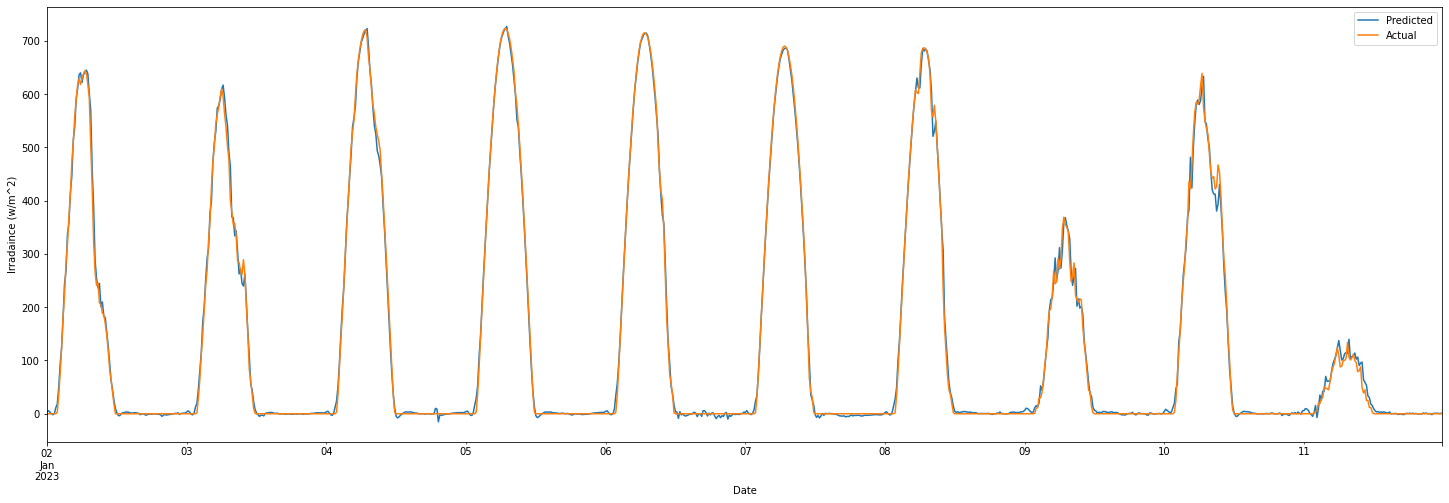

In [ ]:
df_test_date['Actual']=scaler_y.inverse_transform(y_test)
df_test_date['Predicted']=scaler_y.inverse_transform(best_model.predict(X_test))
df_test_date.set_index('Date')[['Predicted','Actual']].iloc[0:96*10].plot(figsize=(25,8))
plt.ylabel('Irradaince (w/m^2)')

In [ ]:
print("r2_Score",r2_score(best_model.predict(X_test),y_test))
print("Root Mean Sqaured Error",np.sqrt(mean_squared_error(df_test_date['Actual'],df_test_date['Predicted'])))

print("Mean Absolute Error",mean_absolute_error(df_test_date['Actual'],df_test_date['Predicted']))

180/180 [==============================] - 2s 11ms/step
r2_Score 0.9920944899934881
Root Mean Sqaured Error 22.205156
Mean Absolute Error 9.911753
